In [1]:
def problem1(path):
    import pandas as pd
    data=pd.read_csv(path,sep=';') #read file
    for i in range(1):
        data_up=data.sort_values(by=data.columns[i+1],ascending=False) #sort first 'year' data
        l=list(data_up['Country Name'])[:10] #get country names of sorted data in a list
        data2=pd.DataFrame({data_up.columns[i+1]:l}) #create a dataframe from the sorted data
    data_old=data2
    for i in range(1,data.columns.size-1): #do the same thing for all other 'year' data
        data_up=data.sort_values(by=data.columns[i+1],ascending=False)
        l=list(data_up['Country Name'])[:10]
        data_new=pd.DataFrame({data_up.columns[i+1]:l})
        data_final=data_old.join(data_new)
        data_old=data_final
    data_final.index+=1 #add +1 to the index column
    return data_final

In [2]:
problem1('final_data/gdp_per_capita.csv')

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
1,Gabon,United States,United States,United States,United States,Kuwait,Kuwait,United States,United States,United States,...,Monaco,Monaco,Monaco,Monaco,Liechtenstein,Liechtenstein,Liechtenstein,Liechtenstein,Luxembourg,Luxembourg
2,Niger,North America,North America,North America,North America,United States,United States,North America,North America,North America,...,Liechtenstein,Liechtenstein,Liechtenstein,Liechtenstein,Luxembourg,Luxembourg,Luxembourg,Luxembourg,Switzerland,"Macao SAR, China"
3,Togo,New Zealand,New Zealand,New Zealand,New Zealand,North America,North America,Kuwait,Kuwait,Kuwait,...,Luxembourg,Luxembourg,Luxembourg,Luxembourg,Norway,Norway,Norway,Switzerland,"Macao SAR, China",Switzerland
4,Burkina Faso,Canada,Sweden,Sweden,Sweden,Sweden,Sweden,Sweden,Sweden,Sweden,...,Norway,Bermuda,Bermuda,Norway,Qatar,"Macao SAR, China","Macao SAR, China",Isle of Man,Norway,Norway
5,Mauritania,Luxembourg,Luxembourg,Luxembourg,Luxembourg,Luxembourg,Iceland,Canada,Canada,Canada,...,Bermuda,Norway,Norway,Switzerland,Bermuda,Qatar,Isle of Man,"Macao SAR, China",Ireland,Iceland
6,Seychelles,Sweden,Canada,Canada,Canada,Canada,Canada,Iceland,Luxembourg,Luxembourg,...,San Marino,San Marino,Switzerland,Bermuda,Switzerland,Bermuda,Qatar,Norway,Iceland,Ireland
7,United States,Switzerland,Switzerland,Switzerland,Switzerland,Iceland,Luxembourg,Bermuda,Switzerland,Virgin Islands (U.S.),...,Qatar,Switzerland,Isle of Man,Qatar,Isle of Man,Switzerland,Switzerland,Qatar,Qatar,Qatar
8,North America,Bermuda,Bermuda,Bermuda,Iceland,Switzerland,Switzerland,Switzerland,Virgin Islands (U.S.),Switzerland,...,Isle of Man,Isle of Man,Qatar,Isle of Man,"Macao SAR, China",Isle of Man,Denmark,Ireland,United States,United States
9,Malawi,Australia,Australia,Australia,Bermuda,Bermuda,Bermuda,Luxembourg,Bermuda,"Bahamas, The",...,Switzerland,Qatar,San Marino,"Macao SAR, China",Australia,Australia,Australia,Australia,North America,North America
10,New Zealand,"Bahamas, The","Bahamas, The","Bahamas, The",Australia,Australia,Denmark,Denmark,"Bahamas, The",Denmark,...,Denmark,Denmark,Denmark,San Marino,Denmark,Denmark,Sweden,United States,Singapore,Singapore


In [3]:
def problem2(path):
    import re
    import pandas as pd
    #2-a
    data0 = pd.read_excel(path)
    result_2a=data0["Subject Field"].nunique() #2-a
    print("Solution A\nthe number of subject fields:\n",result_2a)  #2-a
    
    #2-b
    result_b=data0.sort_values(by='Total authors within field') #2-b 
    b=list(result_b['Total authors within field'].dropna()) #2-b
    bb=list(result_b['Subject Field'].dropna()) #2-b #remove NaN values to be able to reach bottom data
    print("\nSolution B\nthe subject field having the highest number of authors:\n(",bb[-1],',',b[-1],')') #2-b
    print('the subject field having the lowest number of authors:\n(',bb[0],',',b[0],')') #2-b

    #2-c
    result_c=data0.query('Country== "tur"') #extract data of Turkey 
    c=result_c.pivot_table(index=['Subject Field','Authoir Name']) #two main criteria 
    c=c.unstack() #this will make columns from scientists for each outer column indexs 
    c_update=c.notna().sum(axis=1)/6 #obtaining number of scientists for each field. We have 6 outer column index, so i divided result by 6
    c_final=c_update.sort_values(ascending=False)[:10] #top 10 
    last_c=c_final.to_frame(name='') #converting to dataframe 
    last_c=last_c.sort_index().sort_values(by='',ascending=False) #i also sorted output alphabetically
    print('\nSolution C\ntop-10 fields the highest number scientists from Turkey')
    display(last_c)
    
    #2-d
    d=data0.copy()
    d['seniority_level']=d.lastyr-d.firstyr #calculation of seniority level
    a=d['Subject Field'].value_counts() #it will calculate number of scientists for each field 
    d=d.set_index('Subject Field') #this step is needed to be able to add num of scientists according to the index  
    d['scientist_numbers']=a  
    d=d.query('scientist_numbers >= 200') #extracting field having at least 200 scientists
    d=d[d['Rank within field']<=100] #extract data with rank less or equal to 100
    d_update=d[["seniority_level","Number of Papers"]] #columns we need are extracted
    d_update=d_update.groupby('Subject Field').agg(['min','mean','median','max']) #calculations are done
    final_d_top10=d_update.sort_values([('seniority_level','mean')],ascending=False)[:10] #table is sorted for top 1o
    final_d_bottom10=d_update.sort_values([('seniority_level','mean')])[:10] #table is sorted for bottom 10
    print("\n\nSolution D\ntop-10 when data is sorted by mean seniority level")
    display(final_d_top10)
    print("\nbottom-10 when data is sorted by mean seniority level")
    display(final_d_bottom10)
    
    #2-e
    e=data0[data0['Subject Field'].str.contains('engineer',flags=re.IGNORECASE,na=False)] #extract fields containing engineer
    e=e[['Subject Field','Number of Papers','Total authors within field']] #extract columns we need
    result_e=e.groupby('Subject Field').agg('mean') #calulate means of column data, Total authors within field will not chamge since the info is stable
    print('\nSolution E')
    display(result_e)
    

In [4]:
problem2('final_data/worldranking_2020-2.xlsx')

Solution A
the number of subject fields:
 174

Solution B
the subject field having the highest number of authors:
( Oncology & Carcinogenesis , 230678.0 )
the subject field having the lowest number of authors:
( Folklore , 399.0 )

Solution C
top-10 fields the highest number scientists from Turkey


,
Subject Field,
Energy,81.0
Artificial Intelligence & Image Processing,39.0
Materials,33.0
Networking & Telecommunications,31.0
Mining & Metallurgy,26.0
Electrical & Electronic Engineering,24.0
Polymers,24.0
Analytical Chemistry,22.0
Food Science,22.0




Solution D
top-10 when data is sorted by mean seniority level


seniority_level                    \
                                             min   mean median max   
Subject Field                                                        
Chemical Physics                              25  48.21   49.0  83   
Biochemistry & Molecular Biology              26  47.04   47.0  67   
Neurology & Neurosurgery                      27  45.88   46.0  97   
Inorganic & Nuclear Chemistry                 17  45.03   46.0  64   
Physiology                                    21  45.02   45.5  68   
Immunology                                    24  44.91   45.0  95   
Fluids & Plasmas                              17  44.73   45.0  77   
General Chemistry                             22  44.57   45.0  72   
Geochemistry & Geophysics                     24  44.16   44.0  64   
Social Psychology                             19  43.88   44.0  81   

                                 Number of Papers                       
                                              min    mean median   max  
Subject Field                                                           
Chemical Physics                               85  499.26  429.0  1426  
Biochemistry & Molecular Biology               64  457.62  407.0  1158  
Neurology & Neurosurgery                      166  626.32  521.0  1859  
Inorganic & Nuclear Chemistry                  69  538.65  453.0  2108  
Physiology                                     66  287.69  253.0  1493  
Immunology                                    203  622.27  517.5  2212  
Fluids & Plasmas                               73  330.99  264.5  1463  
General Chemistry                             107  470.27  395.5  1961  
Geochemistry & Geophysics                      92  254.80  227.5   829  
Social Psychology                              60  214.80  170.0  2044


bottom-10 when data is sorted by mean seniority level


seniority_level                    \
                                                min   mean median max   
Subject Field                                                           
Distributed Computing                            14  31.34   31.0  51   
Software Engineering                             13  31.56   30.0  55   
Literary Studies                                  6  31.73   31.0  96   
Marketing                                        12  32.05   31.0  56   
Information Systems                              10  32.26   31.5  56   
Information & Library Sciences                   13  32.35   31.0  71   
Logistics & Transportation                       15  32.88   30.5  51   
Human Factors                                    13  33.08   31.5  65   
Electrical & Electronic Engineering              14  33.14   32.0  58   
Nanoscience & Nanotechnology                     18  33.52   31.5  58   

                                    Number of Papers                       
                                                 min    mean median   max  
Subject Field                                                              
Distributed Computing                             25  214.99  182.0   857  
Software Engineering                              24  186.92  154.0   695  
Literary Studies                                   6   44.33   40.0   143  
Marketing                                         23   96.91   85.5   340  
Information Systems                               31  163.37  149.5   444  
Information & Library Sciences                     5  119.56   95.0   422  
Logistics & Transportation                        30  175.49  144.0   628  
Human Factors                                     23  182.30  152.5   514  
Electrical & Electronic Engineering              112  428.92  388.5  2079  
Nanoscience & Nanotechnology                     189  541.28  485.0  1754


Solution E


,Number of Papers,Total authors within field
Subject Field,,
Automobile Design & Engineering,85.925000,1915.0
Biomedical Engineering,208.418649,50331.0
Chemical Engineering,188.526718,55697.0
Civil Engineering,146.867925,42054.0
Electrical & Electronic Engineering,177.857603,87611.0
Environmental Engineering,143.882812,42482.0
Geological & Geomatics Engineering,161.267896,44176.0
Industrial Engineering & Automation,217.994580,87535.0
Mechanical Engineering & Transports,173.486987,92645.0


In [5]:
def problem3(path):
    import pandas as pd
    data30=pd.read_csv(path)
    
    #3-a
    duration=["ten days","one month","six month","more than six month"] #interval names
    result_3a=pd.cut(data30.minimum_nights, [0, 10, 30,180,1000], right=True,labels=duration) #make groups using invervals
    result_update3a=pd.value_counts(result_3a) #count frequencies of each interval
    final_3a=result_update3a.to_frame(name='number of rooms').rename_axis('duration') #arrange output format
    print('Solution 3-a')
    display(final_3a)

    
    #3-b
    result_3b=data30[['neighbourhood','room_type']] #extracting columns we need
    result_3b_update=result_3b.groupby(['neighbourhood','room_type']).size() #calculation of number of room types for each neighbourhood
    result_3b_update=result_3b_update.unstack() #making columns from room types
    result_3b_first=result_3b_update.head() #output
    print('\nSolution 3-b')
    display(result_3b_first)
    result_3b_update_pct=result_3b_update.apply(lambda row: (row/row.sum())*100, axis=1)
    result_3b_second=result_3b_update_pct.round(decimals=2).head() #percentage version of output
    display(result_3b_second)
        
    #3-c
    result_3c=data30[['room_type','price']] #extracting columns we need
    final_3c=result_3c.groupby('room_type').agg(['mean','count','std','min','max']) #applying required functions
    print('\nSolution 3-c')
    display(final_3c) #output   
    
    #3-d
    result_3d=data30.copy()
    result_3d["name"]=result_3d["name"].str.replace(r'[^\w\s]+',' ',regex=True) #removing punctuation characters 
    result_3d_update=result_3d['name'].str.lower() #making characters lower case
    result_3d_update=result_3d_update.str.split(expand=True).stack() #spliting data
    final_3d=result_3d_update.value_counts()[:20] #counting words       
    print('\nSolution 3-d')
    display(final_3d) #output
    
    

In [7]:
problem3('final_data/listings.csv')

Solution 3-a


,number of rooms
duration,
ten days,6013
one month,1055
six month,777
more than six month,62



Solution 3-b


room_type,Entire home/apt,Private room,Shared room
neighbourhood,,,
Ang Mo Kio,12.0,44.0,2.0
Bedok,106.0,261.0,6.0
Bishan,17.0,38.0,2.0
Bukit Batok,12.0,52.0,1.0
Bukit Merah,296.0,163.0,11.0


room_type,Entire home/apt,Private room,Shared room
neighbourhood,,,
Ang Mo Kio,20.69,75.86,3.45
Bedok,28.42,69.97,1.61
Bishan,29.82,66.67,3.51
Bukit Batok,18.46,80.00,1.54
Bukit Merah,62.98,34.68,2.34



Solution 3-c


price                             
                       mean count         std min    max
room_type                                               
Entire home/apt  226.998306  4132  330.921272   0  10000
Private room     110.938480  3381  353.884214  14  10000
Shared room       65.675127   394  157.651534  14   2500


Solution 3-d


room         1727
mrt          1584
in           1225
near         1170
bedroom       991
apartment     894
to            847
city          804
apt           735
2             708
studio        675
1             630
private       602
spacious      576
orchard       574
for           553
with          538
condo         536
cozy          488
bed           458
dtype: int64

In [8]:
def problem4(path):
    import os
    import re
    import pandas as pd
    import datetime
    directory=path
    pattern=r"resident-population-in-(.+).csv" #pattern for extracting state name
    count=0
    dict4b={}
    for csvs in os.listdir(directory):
        name=re.findall(pattern,csvs)
        data40=pd.read_csv(directory+csvs)
        data400=data40[['value','date']].copy()
        data400.date=pd.to_datetime(data400.date)
        data400.set_index('date',inplace=True) #setting date object as index
        data_10years=data400.resample('10Y',closed='left',label='left').mean() #getting mean values
        data_10years.rename({'value': name[0]}, axis=1,inplace=True) #changing column name with state name 
        if count>0:
            data_10years_old=data_10years_old.join(data_10years,how='outer')  #join tables
        if count==0:
            data_10years_old=data_10years
        count+=1
    data_10years_old.index+=datetime.timedelta(days=1) #fixing index
    data_10years_old=data_10years_old.reindex(sorted(data_10years_old.columns), axis=1) #sorting columns according to the column name
    data_10years_old=data_10years_old.round(decimals=1) #rounding row values like in the solution format
    
    "----------b---------"
    for a in data_10years_old.columns:
        x=data_10years_old.loc['1950-01-01',a]
        y=data_10years_old.loc['2000-01-01',a]
        dict4b[a]=(abs(y-x)/x)*100
    dict4b=sorted(dict4b.items(), key=lambda x: x[1], reverse=True)
    display(data_10years_old.head()) #4-a
    print('Highest change in 2000-2009 compared to 1950-1959:\n',dict4b[0][0]) #4-b
    print('Lowest change in 2000-2009 compared to 1950-1959:\n',dict4b[-1][0]) #4-b
   
    

In [9]:
problem4('final_data/us_state_pop_data/')

,alabama,alaska,arkansas,california,colorado,connecticut,florida,georgia,hawaii,illinois,...,new-jersey,new-mexico,new-york,ohio,oklahoma,oregon,pennsylvania,rhode-island,tennessee,texas
date,,,,,,,,,,,,,,,,,,,,,
1900-01-01,1990.0,NaN,1427.2,1852.3,670.8,1002.6,612.1,2404.2,NaN,5194.1,...,2130.3,251.0,8056.3,4466.8,1218.4,520.4,6912.8,478.1,2101.6,3425.1
1910-01-01,2291.2,NaN,1683.0,2920.4,865.2,1245.5,853.3,2780.9,NaN,6077.1,...,2827.1,350.3,9653.4,5196.3,1842.2,733.4,8252.7,584.3,2267.4,4322.4
1920-01-01,2515.4,NaN,1805.8,4583.2,994.6,1493.8,1218.8,2917.9,NaN,7216.4,...,3619.0,392.5,11037.9,6302.5,2213.5,868.5,9349.5,661.1,2500.7,5261.7
1930-01-01,2712.0,NaN,1883.6,6193.7,1081.2,1656.6,1620.2,2986.4,NaN,7785.7,...,4099.0,471.7,13227.7,6768.4,2372.3,1007.9,9788.3,684.7,2759.7,6100.5
1940-01-01,2898.9,NaN,1857.6,8850.9,1177.1,1850.4,2363.3,3214.5,NaN,8075.6,...,4399.1,552.8,13442.4,7262.4,2153.3,1250.3,9805.1,766.3,3025.7,7026.9


Highest change in 2000-2009 compared to 1950-1959:
 nevada
Lowest change in 2000-2009 compared to 1950-1959:
 iowa


In [12]:
def problem5(path):
    import pandas as pd
    data50=pd.read_csv(path)
    
    #5-a
    data50a=data50[['gender','year','count']] #extract required columns
    data500=data50a.groupby(['year','gender']).sum() #make calculation
    data500=data500.unstack()
    final_5a=data500.stack().reset_index()
    final_5a=final_5a.pivot_table(values='count',columns=['gender'],index=['year'])
    final_5a.plot() #5-a output
    
    #5-b
    data50b=data50[['name','gender','count']]
    data500b=data50b.groupby(['name','gender']).sum()
    data500b=data500b.unstack()
    final5b=data500b.stack().reset_index()
    final5b=final5b.pivot_table(columns='gender',index='name',values='count')
    final5b=final5b.reset_index()    
    #sorting male column
    data_upp=final5b.sort_values(by=final5b.columns[1],ascending=False)
    l=list(data_upp['name'])[:10]
    data22=pd.DataFrame({data_upp.columns[1]:l})
    #sorting female column
    data_upp2=final5b.sort_values(by=final5b.columns[2],ascending=False)
    l2=list(data_upp2['name'])[:10]
    data222=pd.DataFrame({data_upp.columns[2]:l2})
    data_final5b=data22.join(data222) #join male and female dataframes
    data_final5b.index+=1
    data_final5b = data_final5b.rename({'E': 'male', 'K': 'female'}, axis=1) #rename column names
    return data_final5b
    
    
    

,male,female
1,ALI,FATMA
2,HASAN,AYSE
3,MEHMET,EMINE
4,OSMAN,HATICE
5,MUSTAFA,ZEHRA
6,ISMAIL,SERIFE
7,AHMET,ZEYNEP
8,HUSEYIN,MERYEM
9,ABDULLAH,HANIFE
10,MAHMUT,CEMILE


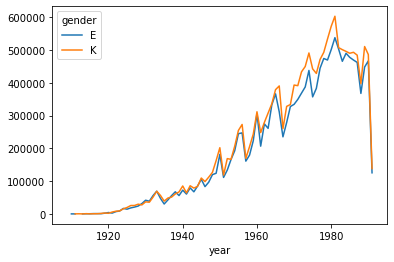

In [13]:
problem5('final_data/names-month-random.csv')